In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime
%matplotlib inline
from Tkinter import Tk
from tkFileDialog import askopenfilename
import math
from IPython.display import HTML,display

In [19]:
# this function to get avgs of each event to write in to database
def get_avg(files):
    avgs = np.zeros((0,6))
    for file in files:
        with open(file) as fp:
            lines = fp.readlines()

        event_one = np.zeros((1,0))
        event_two = np.zeros((1,0))
        event_three = np.zeros((1,0))
        event_four = np.zeros((1,0))
        event_five = np.zeros((1,0))
        event_six = np.zeros((1,0))

        for line in lines:
            if "Robot_id" in line:
                splitted_line = line.split(" ")
                if splitted_line[7] is '0':
                    event_one = np.hstack([event_one,[[float(splitted_line[8])]]])
                elif splitted_line[7] is '1':
                    event_two = np.hstack([event_two,[[float(splitted_line[8])]]])
                elif splitted_line[7] is '2':
                    event_three = np.hstack([event_three,[[float(splitted_line[8])]]])
                elif splitted_line[7] is '3':
                    event_four = np.hstack([event_four,[[float(splitted_line[8])]]])
                elif splitted_line[7] is '4':
                    event_five = np.hstack([event_five,[[float(splitted_line[8])]]])
                elif splitted_line[7] is '5':
                    event_six = np.hstack([event_six,[[float(splitted_line[8])]]]) 
        avgs = np.vstack([avgs,[np.average(event_one),np.average(event_two),np.average(event_three),
                       np.average(event_four),np.average(event_five),np.average(event_six)]])
    return avgs
# use the below function only for parsing neo4j write logs
def get_avg_neo(files):
    avgs = np.zeros((0,6))
    for file in files:
        with open(file) as fp:
            lines = fp.readlines()

        event_one = np.zeros((1,0))
        event_two = np.zeros((1,0))
        event_three = np.zeros((1,0))
        event_four = np.zeros((1,0))
        event_five = np.zeros((1,0))
        event_six = np.zeros((1,0))

        for line in lines:
            if "Robot_id" in line:
                splitted_line = line.split(" ")
                if splitted_line[6] is '1':
                    event_one = np.hstack([event_one,[[float(splitted_line[7])]]])
                elif splitted_line[6] is '2':
                    event_two = np.hstack([event_two,[[float(splitted_line[7])]]])
                elif splitted_line[6] is '3':
                    event_three = np.hstack([event_three,[[float(splitted_line[7])]]])
                elif splitted_line[6] is '4':
                    event_four = np.hstack([event_four,[[float(splitted_line[7])]]])
                elif splitted_line[6] is '5':
                    event_five = np.hstack([event_five,[[float(splitted_line[7])]]])
                elif splitted_line[6] is '6':
                    event_six = np.hstack([event_six,[[float(splitted_line[7])]]]) 
        avgs = np.vstack([avgs,[np.average(event_one),np.average(event_two),np.average(event_three),
                       np.average(event_four),np.average(event_five),np.average(event_six)]])
    return avgs

def get_avg_read(files):
    avgs = np.zeros((0,4))
    for file in files:
        with open(file) as fp:
            lines = fp.readlines()
            
        query_one = np.zeros((1,0))
        query_two = np.zeros((1,0))
        query_three = np.zeros((1,0))
        query_four = np.zeros((1,0))

        for line in lines:
            if "Robot_id" in line:
                splitted_line = line.split(" ")
                if splitted_line[7] is '0':
                    query_one = np.hstack([query_one,[[float(splitted_line[8])]]])
                elif splitted_line[7] is '1':
                    query_two = np.hstack([query_two,[[float(splitted_line[8])]]])
                elif splitted_line[7] is '2':
                    query_three = np.hstack([query_three,[[float(splitted_line[8])]]])
                elif splitted_line[7] is '3':
                    query_four = np.hstack([query_four,[[float(splitted_line[8])]]])
        avgs = np.vstack([avgs,[np.average(query_one),np.average(query_two),np.average(query_three),
                               np.average(query_four)]])
    return avgs

def get_replica_results(files):
        result = []
        #get the write time stamp
        with open(files[0]) as fp:
            lines = fp.readlines()
        write_vals = {}
        for line in lines:
            if "replica_test_write" in line:
                splitted_line = line.split(" ")
                timestamp = splitted_line[9] + " " + splitted_line[10].split("\n")[0]
                write_vals[splitted_line[7]] = datetime.strptime(timestamp, '%Y-%m-%d %H:%M:%S.%f')
        
        #get the read time stamp
        with open(files[1]) as fp:
            lines = fp.readlines()
        read_vals = {}
        for line in lines:
            if "replica_test_read" in line:
                splitted_line = line.split(" ")
                timestamp = splitted_line[9] + " " + splitted_line[10].split("\n")[0]
                read_vals[splitted_line[7]] = datetime.strptime(timestamp, '%Y-%m-%d %H:%M:%S.%f')  
        
        for key,value in read_vals.iteritems():
            diff = value-write_vals[key]
            result.append(float(str(diff).split(".")[1])/1000000)
        return round(np.average(result),4)
        
def open_files(n):
    files = []
    for i in range(n):
        Tk().withdraw() # we don't want a full GUI, so keep the root window from appearing
        filename = askopenfilename() # show an "Open" dialog box and return the path to the selected file
        files.append(filename)
    return files

# Write performance for Neo4J and OrientDB (Robot 1)

In [55]:
neo_files_1 = open_files(3)
orient_files_1 = open_files(3)

In [56]:

neo_avgs_1 = get_avg_neo(neo_files_1)
neo_df_1 = pd.DataFrame(neo_avgs_1, columns=['Event-1', 'Event-2', 'Event-3', 'Event-4','Event-5','Event-6'],
                   index=['30hz','60hz','120hz'])


orient_avgs_1 = get_avg(orient_files_1)
orient_df_1 = pd.DataFrame(orient_avgs_1, columns=['Event-1', 'Event-2', 'Event-3', 'Event-4','Event-5','Event-6'],
                   index=['30hz','60hz','120hz'])


Text(0,0.5,u'Average query execution time (Seconds)')

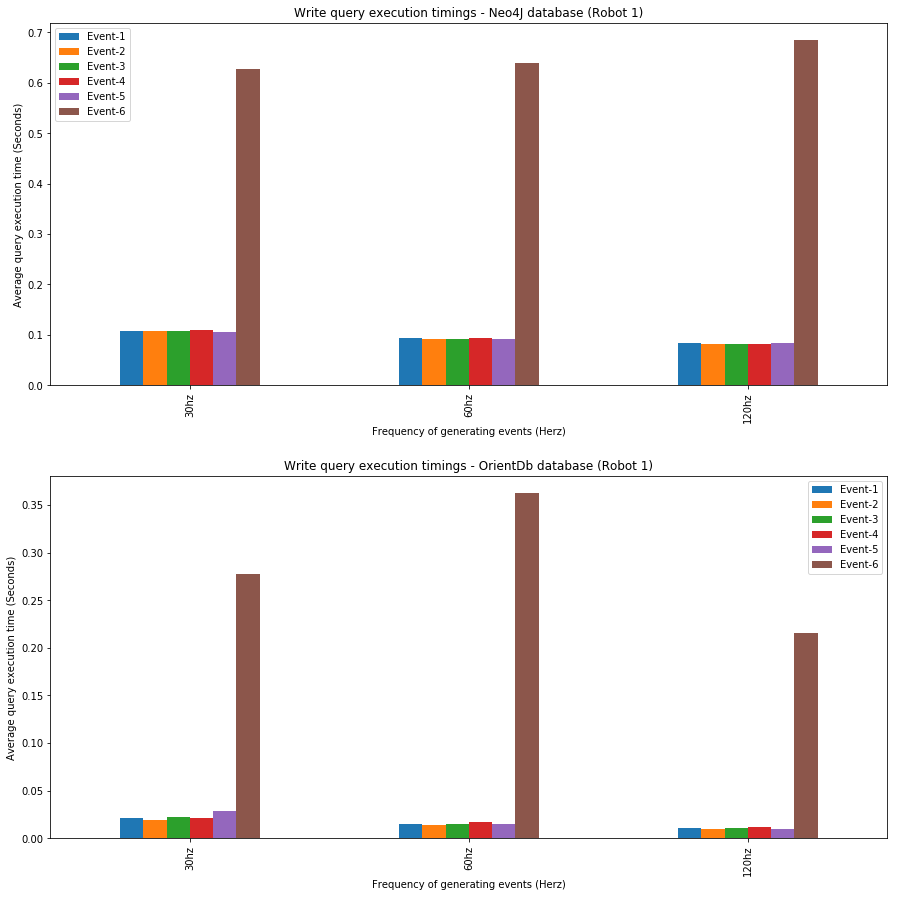

In [68]:
#Init subplots with height and width
fig_1, axes_1 = plt.subplots(nrows=2, ncols=1)
fig_1.set_figheight(15)
fig_1.set_figwidth(15)
fig_1.subplots_adjust(hspace=.25)

#Ploting the averate values from neo4j and orientDB
neo_plot_1 = neo_df_1.plot(ax=axes_1[0],kind='bar')
orient_plot_1 = orient_df_1.plot(ax=axes_1[1],kind='bar')

#Setting title for subplots
neo_plot_1.set_title("Write query execution timings - Neo4J database (Robot 1)")
neo_plot_1.set_xlabel("Frequency of generating events (Herz)")
neo_plot_1.set_ylabel("Average query execution time (Seconds)")

orient_plot_1.set_title("Write query execution timings - OrientDb database (Robot 1)")
orient_plot_1.set_xlabel("Frequency of generating events (Herz)")
orient_plot_1.set_ylabel("Average query execution time (Seconds)")

In [82]:
print "Write query execution timings - Neo4J database (Robot 1)"
HTML(neo_df_1.to_html(classes="table table-striped table-bordered"))

Write query execution timings - Neo4J database (Robot 1)


,Event-1,Event-2,Event-3,Event-4,Event-5,Event-6
30hz,0.108357,0.107107,0.108078,0.109604,0.105533,0.626815
60hz,0.093357,0.091464,0.091945,0.093043,0.092700,0.640276
120hz,0.083857,0.081955,0.081966,0.081659,0.083261,0.684756


In [83]:
print "Write query execution timings - OrientDB database (Robot 1)"
HTML(orient_df_1.to_html(classes="table table-striped table-bordered"))

Write query execution timings - OrientDB database (Robot 1)


,Event-1,Event-2,Event-3,Event-4,Event-5,Event-6
30hz,0.021443,0.019567,0.022520,0.021469,0.028925,0.277428
60hz,0.015330,0.014337,0.015025,0.016958,0.014800,0.362468
120hz,0.010405,0.009881,0.010414,0.012124,0.009918,0.215152


# Write performance for Neo4J and OrientDB (Robot 2)

In [72]:
neo_files_2 = open_files(3)
orient_files_2 = open_files(3)

In [73]:

neo_avgs_2 = get_avg_neo(neo_files_2)
neo_df_2 = pd.DataFrame(neo_avgs_2, columns=['Event-1', 'Event-2', 'Event-3', 'Event-4','Event-5','Event-6'],
                   index=['30hz','60hz','120hz'])


orient_avgs_2 = get_avg(orient_files_2)
orient_df_2 = pd.DataFrame(orient_avgs_2, columns=['Event-1', 'Event-2', 'Event-3', 'Event-4','Event-5','Event-6'],
                   index=['30hz','60hz','120hz'])


Text(0,0.5,u'Average query execution time (Seconds)')

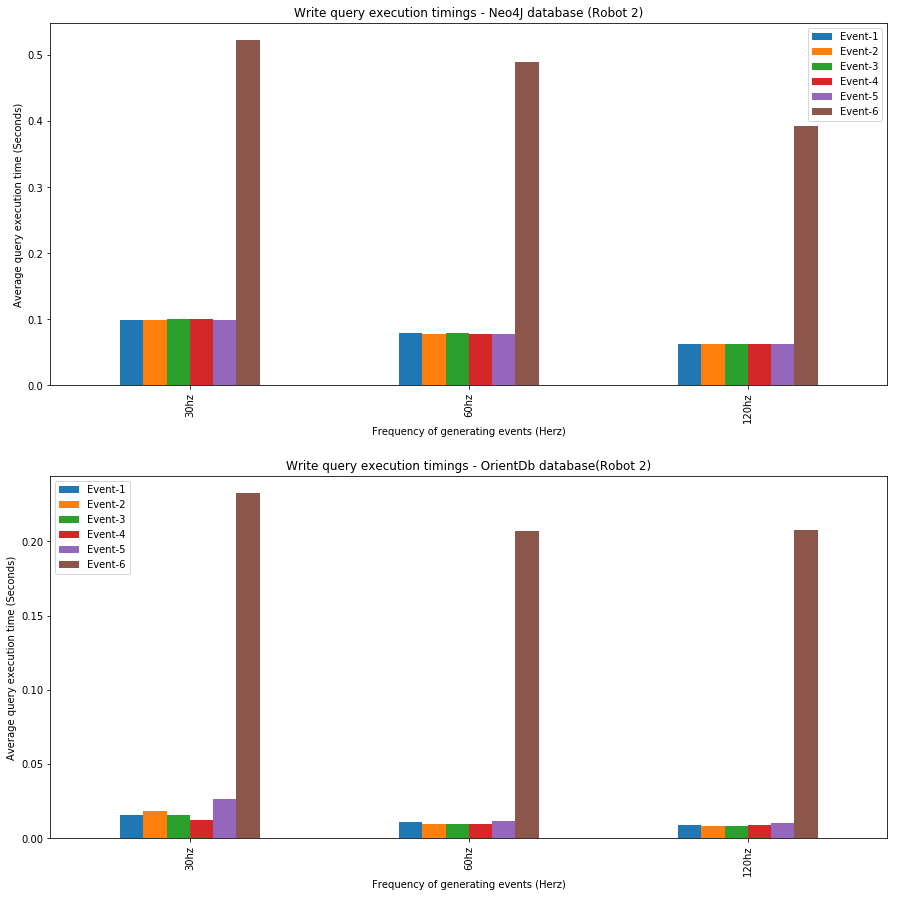

In [75]:
#Init subplots with height and width
fig_2, axes_2 = plt.subplots(nrows=2, ncols=1)
fig_2.subplots_adjust(hspace=.25)
fig_2.set_figheight(15)
fig_2.set_figwidth(15)

#Ploting the averate values from neo4j and orientDB
neo_plot_2 = neo_df_2.plot(ax=axes_2[0],kind='bar')
orient_plot_2 = orient_df_2.plot(ax=axes_2[1],kind='bar')

#Setting title for subplots
neo_plot_2.set_title("Write query execution timings - Neo4J database (Robot 2)")
neo_plot_2.set_xlabel("Frequency of generating events (Herz)")
neo_plot_2.set_ylabel("Average query execution time (Seconds)")

orient_plot_2.set_title("Write query execution timings - OrientDb database(Robot 2)")
orient_plot_2.set_xlabel("Frequency of generating events (Herz)")
orient_plot_2.set_ylabel("Average query execution time (Seconds)")

In [79]:
print "Write query execution timings - Neo4J database (Robot 2)"
HTML(neo_df_2.to_html(classes="table table-striped table-bordered"))

Write query execution timings - Neo4J database (Robot 2)


,Event-1,Event-2,Event-3,Event-4,Event-5,Event-6
30hz,0.099008,0.098303,0.099902,0.099658,0.098235,0.522704
60hz,0.078495,0.077696,0.078581,0.078416,0.078352,0.490067
120hz,0.063169,0.062207,0.063203,0.063236,0.062470,0.392051


In [80]:
print "Write query execution timings - OrientDB database (Robot 2)"
HTML(orient_df_2.to_html(classes="table table-striped table-bordered"))

Write query execution timings - OrientDB database (Robot 2)


,Event-1,Event-2,Event-3,Event-4,Event-5,Event-6
30hz,0.015659,0.018587,0.015761,0.012546,0.026548,0.232383
60hz,0.010724,0.009726,0.009659,0.009442,0.011393,0.206819
120hz,0.008829,0.008050,0.008037,0.009013,0.010385,0.207246


# Break


In [ ]:
# Robot 1 - Write only scenario (orientdb)
avgs = get_avg(files)
df2 = pd.DataFrame(avgs, columns=['Event-1', 'Event-2', 'Event-3', 'Event-4','Event-5','Event-6'],
                   index=['30hz','60hz','120hz'])

ax = df2.plot(kind='bar')
# HTML(df2.to_html(classes="table table-striped table-bordered"))

In [4]:
files = open_files(2)

,Query-1,Query-2,Query-3,Query-4
30hz,0.004626,0.004688,0.004615,0.004328
60hz,0.004258,0.004252,0.004187,0.003984


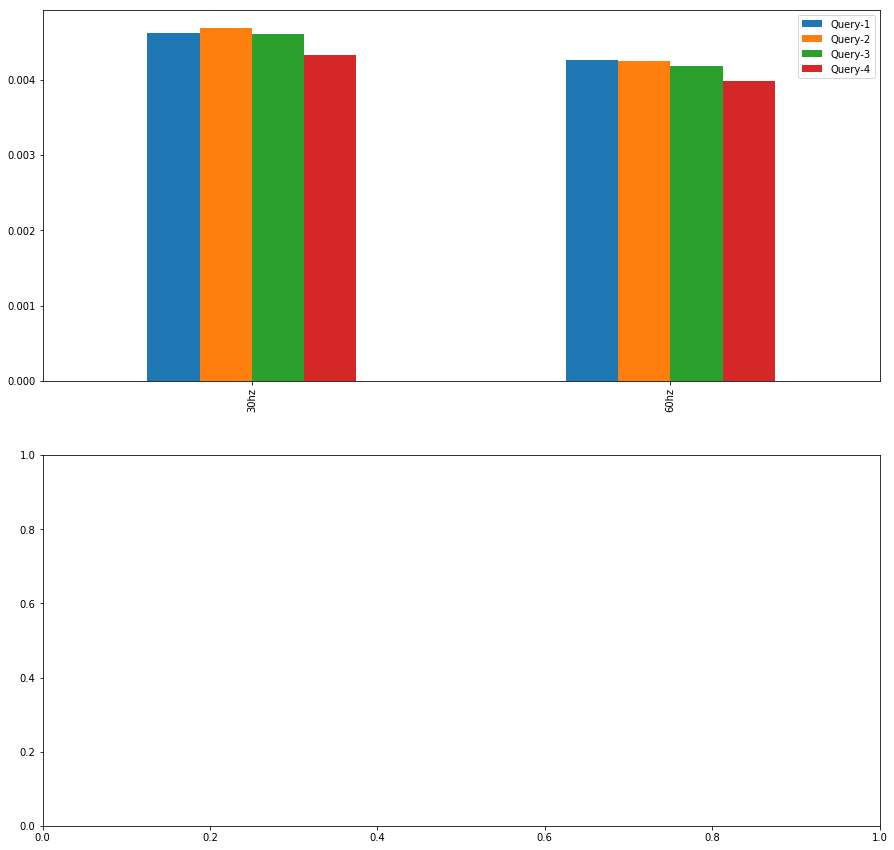

In [18]:
avgs = get_avg_read(files)
df2 = pd.DataFrame(avgs, columns=['Query-1', 'Query-2', 'Query-3','Query-4'],
                   index=['30hz','60hz'])
fig, axes = plt.subplots(nrows=2, ncols=1)
fig.set_figheight(15)
fig.set_figwidth(15)
ax = df2.plot(ax=axes[0],kind='bar')
HTML(df2.to_html(classes="table table-striped table-bordered"))

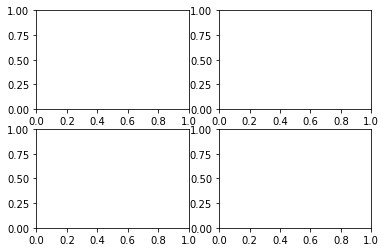

In [10]:
fig, axes = plt.subplots(nrows=2, ncols=2)

In [42]:
files = open_files(2)

In [54]:
print "Average replication time for events in neo4j,", get_replica_results(files)

Average replication time for events in neo4j, 0.1918


In [11]:
# Robot 1 - Read only scenario
avgs = get_avg_read(open_files(3))
df2 = pd.DataFrame(avgs, columns=['Query-1', 'Query-2', 'Query-3','Query-4'],
                   index=['30hz','60hz','120hz'])

ax = df2.plot(ax=axes[0,0],kind='bar',figsize=(15,10))
HTML(df2.to_html(classes="table table-striped table-bordered"))


TypeError: coercing to Unicode: need string or buffer, tuple found

,Query-1,Query-2,Query-3,Query-4
30hz,0.003082,0.003068,0.021210,0.002242
60hz,0.002596,0.002592,0.018059,0.001855
120hz,0.001488,0.001492,0.010893,0.001065


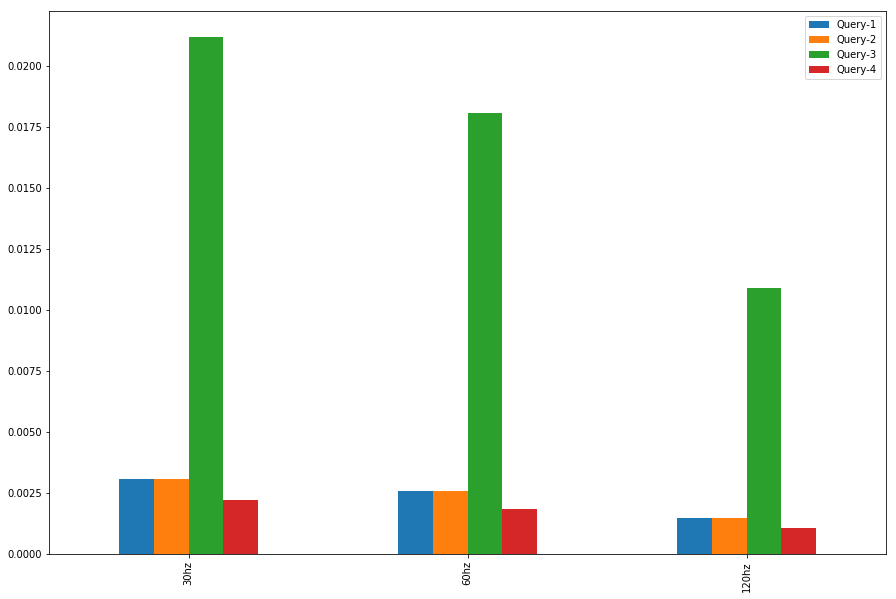

In [10]:
# Robot 2 - Read only scenario
avgs = get_avg_read(open_files(3))
df2 = pd.DataFrame(avgs, columns=['Query-1', 'Query-2', 'Query-3','Query-4'],
                   index=['30hz','60hz','120hz'])

ax = df2.plot(kind='bar',figsize=(15,10))
HTML(df2.to_html(classes="table table-striped table-bordered"))

,Query-1,Query-2,Query-3,Query-4
30hz,0.003045,0.003074,0.021156,0.002214
60hz,0.002569,0.002577,0.017665,0.001842
120hz,0.001488,0.001487,0.010909,0.001070


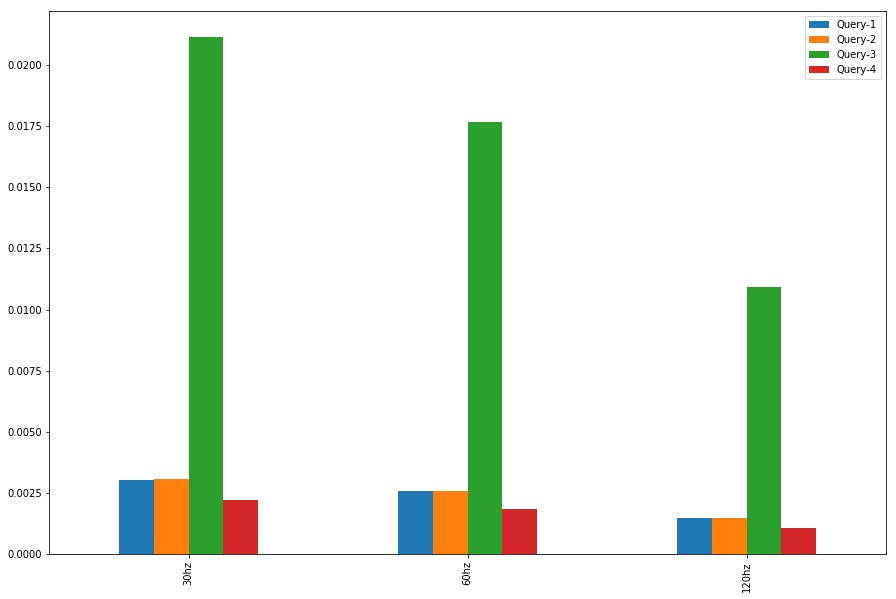

In [11]:
# Robot 3 - Read only scenario
avgs = get_avg_read(open_files(3))
df2 = pd.DataFrame(avgs, columns=['Query-1', 'Query-2', 'Query-3','Query-4'],
                   index=['30hz','60hz','120hz'])

ax = df2.plot(kind='bar',figsize=(15,10))
HTML(df2.to_html(classes="table table-striped table-bordered"))

In [41]:

# the below code helps to show values over the bars
# for p in ax.patches:
#     ax.annotate(str(truncate(p.get_height(),2)), xy=(truncate(p.get_x(),2), truncate(p.get_height(),2)))

,Event-1,Event-2,Event-3,Event-4,Event-5,Event-6
30hz,0.108357,0.107107,0.108078,0.109604,0.105533,0.626815
60hz,0.093357,0.091464,0.091945,0.093043,0.092700,0.640276
120hz,0.083857,0.081955,0.081966,0.081659,0.083261,0.684756


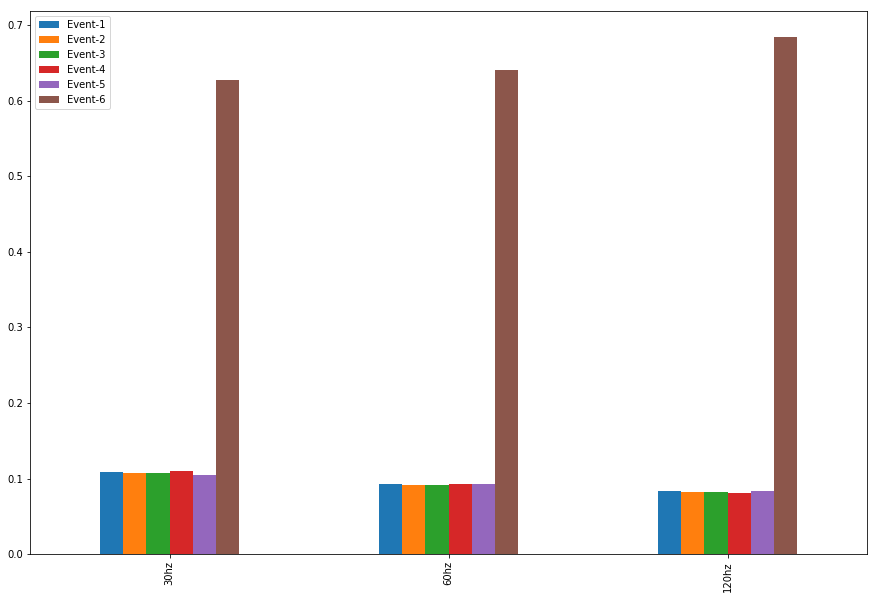

In [36]:
# Robot 1 - Write only scenario
avgs = get_avg(open_files(3))
df2 = pd.DataFrame(avgs, columns=['Event-1', 'Event-2', 'Event-3', 'Event-4','Event-5','Event-6'],
                   index=['30hz','60hz','120hz'])

ax = df2.plot(kind='bar',figsize=(15,10))
HTML(df2.to_html(classes="table table-striped table-bordered"))

In [4]:
files = open_files(3)

,Event-1,Event-2,Event-3,Event-4,Event-5,Event-6
30hz,0.021443,0.019567,0.022520,0.021469,0.028925,0.277428
60hz,0.015330,0.014337,0.015025,0.016958,0.014800,0.362468
120hz,0.010405,0.009881,0.010414,0.012124,0.009918,0.215152


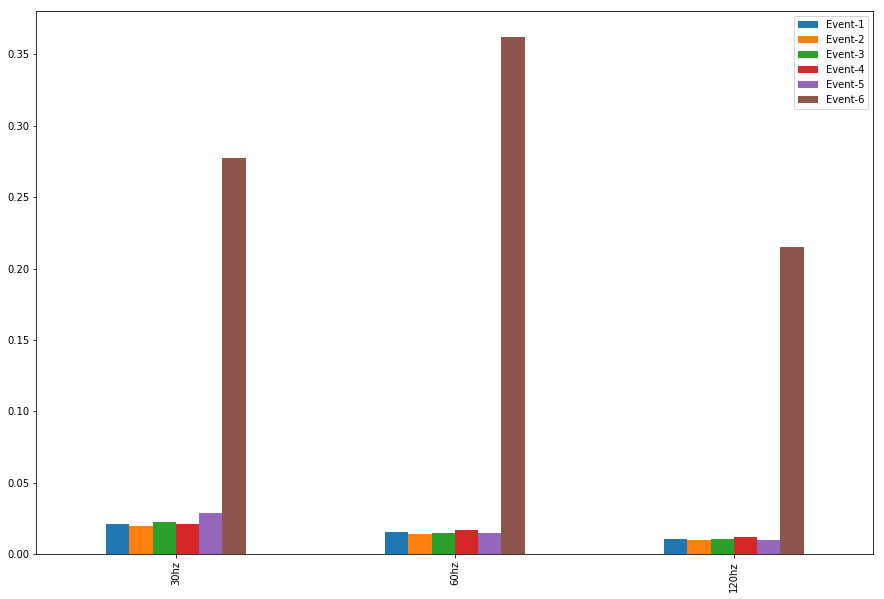

In [9]:
# Robot 1 - Write only scenario (orientdb)
avgs = get_avg(files)
df2 = pd.DataFrame(avgs, columns=['Event-1', 'Event-2', 'Event-3', 'Event-4','Event-5','Event-6'],
                   index=['30hz','60hz','120hz'])

ax = df2.plot(kind='bar',figsize=(15,10))
HTML(df2.to_html(classes="table table-striped table-bordered"))

,Event-1,Event-2,Event-3,Event-4,Event-5,Event-6
30hz,0.099008,0.098303,0.099902,0.099658,0.098235,0.522704
60hz,0.078495,0.077696,0.078581,0.078416,0.078352,0.490067
120hz,0.063169,0.062207,0.063203,0.063236,0.062470,0.392051


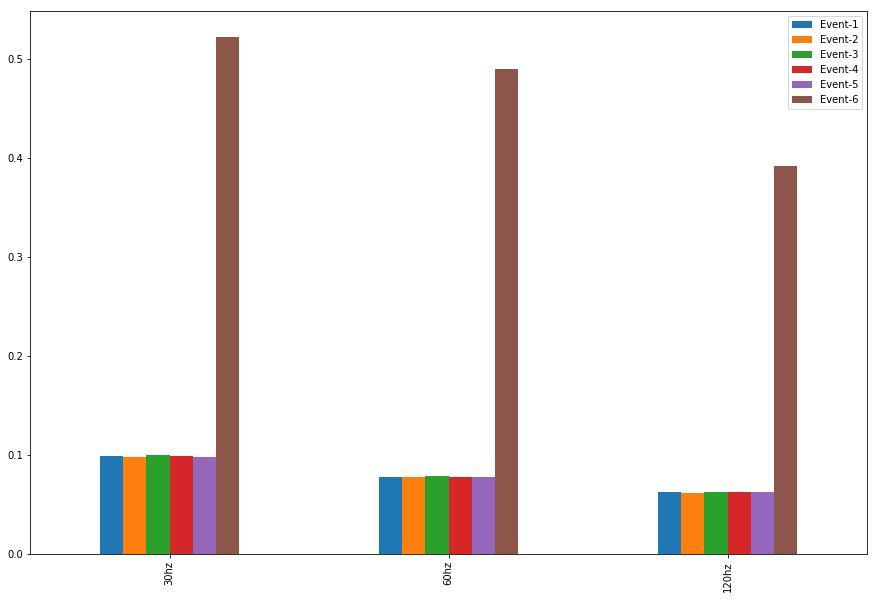

In [39]:
# Robot 2 - Write only scenario
avgs = get_avg(open_files(3))
df2 = pd.DataFrame(avgs, columns=['Event-1', 'Event-2', 'Event-3', 'Event-4','Event-5','Event-6'],
                   index=['30hz','60hz','120hz'])

ax = df2.plot(kind='bar',figsize=(15,10))
HTML(df2.to_html(classes="table table-striped table-bordered"))

,Event-1,Event-2,Event-3,Event-4,Event-5,Event-6
30hz,0.112315,0.110434,0.111139,0.110892,0.110778,0.620318
60hz,0.077442,0.076039,0.077621,0.077380,0.076529,0.443877
120hz,0.062978,0.061585,0.062658,0.063184,0.062412,0.347923


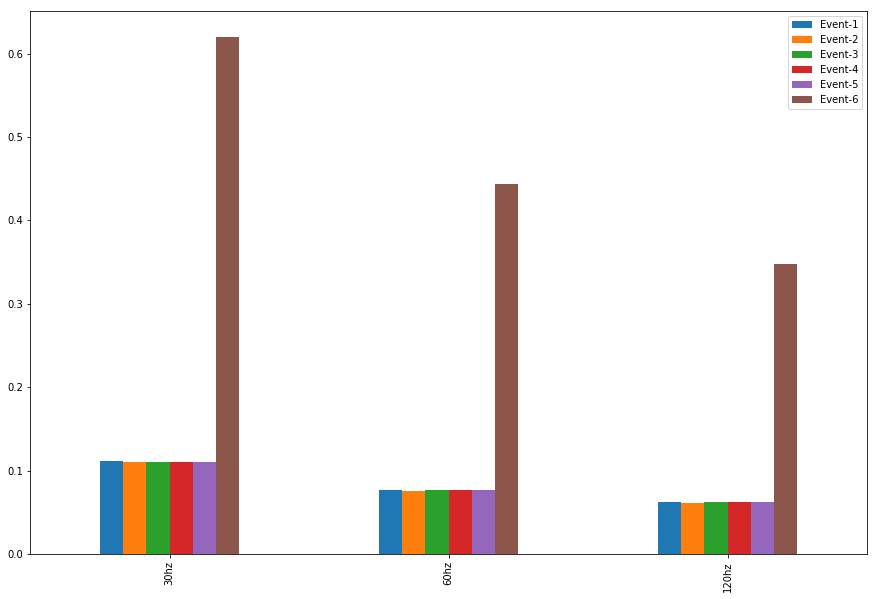

In [40]:
# Robot 3 - Write only scenario
avgs = get_avg(open_files(3))
df2 = pd.DataFrame(avgs, columns=['Event-1', 'Event-2', 'Event-3', 'Event-4','Event-5','Event-6'],
                   index=['30hz','60hz','120hz'])

ax = df2.plot(kind='bar',figsize=(15,10))
HTML(df2.to_html(classes="table table-striped table-bordered"))

,Event-1,Event-2,Event-3,Event-4,Event-5,Event-6
30hz,0.099707,0.098378,0.101618,0.100307,0.098450,0.533962
60hz,0.100643,0.099033,0.099171,0.099605,0.099805,0.712155
120hz,0.069795,0.069252,0.070408,0.069979,0.069794,0.575710


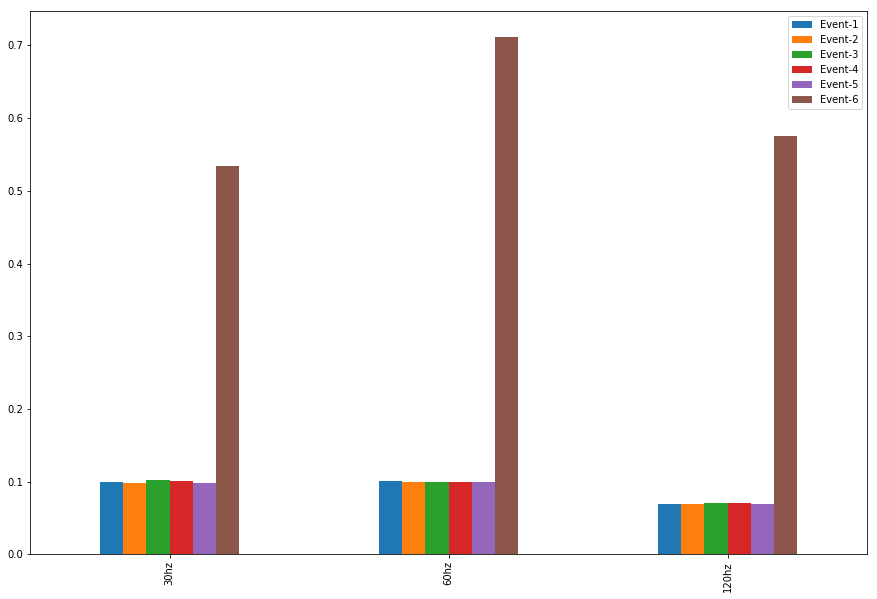

In [7]:
# Robot 3 - Write along with read scenario
avgs = get_avg(open_files(3))
df2 = pd.DataFrame(avgs, columns=['Event-1', 'Event-2', 'Event-3', 'Event-4','Event-5','Event-6'],
                   index=['30hz','60hz','120hz'])

ax = df2.plot(kind='bar',figsize=(15,10))
HTML(df2.to_html(classes="table table-striped table-bordered"))